# Предсказание временных рядов

## Введение. Постановка целей и задач.

##Введение

Одна из главных задач при инвестировании капитала — попытаться найти такие финансовые инструменты, с помощью которых можно увеличить или как минимум сохранить свои вложения. Крупные инвесторы, средние игроки и мелкие спекулянты разнообразными способами пытаются предвидеть будущее и спрогнозировать дальнейшую динамику рынков.

Чтобы инвестиции были эффективны, надо проводить многоуровневый анализ фондового рынка, реализуемый в инвестиционной стратегии. В зависимости от объема и срока инвестирования применяются два основных подхода: технический и фундаментальный анализ.

С помощью технического анализа прогнозируется изменение цен в будущем на основе анализа изменений цен в прошлом. В его основе лежит анализ временных рядов цен, чаще всего графиков с различными таймфреймами. Кроме того, используется информация об объемах торгов и другие важные статистические данные.

В техническом анализе применяются разнообразные инструменты и методы, но все они основаны на одном общем предположении: анализируя временные ряды посредством выделения трендов, возможно спрогнозировать поведение цен в будущем. 

Датасет используемый в этом проекте отображает цены акций компании Coca Cola в долларах США. Данные были получены с сайта Yahoo Finance и загружены на Kaggle.com([Ссылка на Kaggle](https://www.kaggle.com/datasets/meetnagadia/coco-cola-stock-data-19622021))

Компания Coca-Cola всегда была оптимальным инструментом для инвестирования в связи с ее стабильностью и ежегодным ростом дивидендов, которые возрастают на протяжении последней четверти века. 

##Цель:
Оценить инвестиционную привлекательность акции компании Coca-Cola, выбрав оптимальный метод прогнозирования и предсказав изменение цены акций в ближайшем будущем.
 
##Задачи: 

1. Познакомиться с данными о движении цен на акции компании в период с 1962 по 2021 годы.
2. Провести технический анализ компании Coca-Cola.
3. Спрогнозировать движение цены акций компании.

### Импорт Датафрейма, библиотек, написание функций.

In [ ]:
%pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 3.4 MB/s eta 0:00:00


In [ ]:
%pip install ipympl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.6 MB/s eta 0:00:00


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.1 MB/s eta 0:00:00


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
# Импортирование необходимых библиотек
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima 

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import math
import datetime as dt

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [ ]:
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from keras.models import Sequential # Create Model
from keras.layers import Dense # Neurons
from keras.layers import LSTM # Long Short Term Memory
from sklearn.preprocessing import MinMaxScaler # Normalize
from sklearn.metrics import mean_squared_error # Loss Function
from sklearn.model_selection import train_test_split

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [ ]:
#Импортирование данных
cola = pd.read_csv('COCO COLA.csv')
cola["Date"] = pd.to_datetime(cola["Date"], format='%Y/%m/%d')
#cola["Date"] = pd.to_datetime(cola["Date"])

In [ ]:
#Вывод последних 2 строк датасета
cola.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume
15094,2021-12-16,57.980000,58.880001,57.900002,58.650002,58.650002,24696900
15095,2021-12-17,58.490002,58.919998,57.700001,57.730000,57.730000,51874400


### Знакомство с данными.

In [ ]:
print(cola.info())
print('------------------------')
row_count = cola.shape[0]
column_count = cola.shape[1]
print('Количество строк:', row_count)
print('Количество столбцов:', column_count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15096 entries, 0 to 15095
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       15096 non-null  datetime64[ns]
 1   Open       15096 non-null  float64       
 2   High       15096 non-null  float64       
 3   Low        15096 non-null  float64       
 4   Close      15096 non-null  float64       
 5   Adj Close  15096 non-null  float64       
 6   Volume     15096 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 825.7 KB
None
------------------------
Количество строк: 15096
Количество столбцов: 7


In [ ]:
unique_years = cola['Date'].dt.year.unique() 
print(unique_years)

[1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021]


В данном датасете представлены данные за период с 1962 по 2021 год.

In [ ]:
#Определение столбца "Date", как индекс для дальнейшей работы с данными
cola.set_index('Date', inplace = True)
cola.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200


Данный датасет описывает поведение акций компании Coca-Cola на фондовом рынке с 1962 по 2021 год.

*Количество строк*: 15096

*Количество столбцов*: 7

Пропуски данных отсутствуют, что говорит о целостности данных.

*Расшифровка значений столбцов:*

*Open* - цена акций на момент открытия торгов

*High* - максимальная цена за день

*Low* - минимальная цена за день

*Close* - цена акции на момент закрытия торгов

*Adj Close* - цена закрытия с учетом выплаты дивидендов

*Volume* - количество сделок за текущий день

Данный датасет имеет все данные для проведения качественного технического анализа компании.


---



## Предобработка данных

### Фильтрация данных

Количество столбцов в данном датасете немного, всего 7.

Однако для предсказания изменения цен акций не столь важно количество сделок (Volume).

Также для технического анализа не имеет значения дивиденды. Поэтому от столбца Adj Close также можно избавиться.

In [ ]:
cola=cola[['Open', 'High', 'Low', 'Close']]
cola.tail()

,Open,High,Low,Close
Date,,,,
2021-12-13,56.980000,57.930000,56.959999,57.759998
2021-12-14,57.400002,58.169998,57.400002,57.799999
2021-12-15,57.930000,58.250000,57.650002,58.060001
2021-12-16,57.980000,58.880001,57.900002,58.650002
2021-12-17,58.490002,58.919998,57.700001,57.730000


### Обработка пропусков

In [ ]:
#количество пропусков NaN
missing_values=cola.isnull().sum()
print(missing_values)
print('---------------')
print(cola.index)

Open     0
High     0
Low      0
Close    0
dtype: int64
---------------
DatetimeIndex(['1962-01-02', '1962-01-03', '1962-01-04', '1962-01-05',
               '1962-01-08', '1962-01-09', '1962-01-10', '1962-01-11',
               '1962-01-12', '1962-01-15',
               ...
               '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09',
               '2021-12-10', '2021-12-13', '2021-12-14', '2021-12-15',
               '2021-12-16', '2021-12-17'],
              dtype='datetime64[ns]', name='Date', length=15096, freq=None)


Как и говорилось выше пропусков типа NaN в данном датасете нет.
Однако если взглянуть на даты то можно увидеть что после 1962-01-*05* следует 1962-01-*08*, после 1962-01-*12* - 1962-01-*15*, а после 2021-12-*10* следует 2021-12-*13*.

Такие пропуски в 2 дня наблюдаются в основном каждые 5 дней, что скорее всего говорит о том, что пропущенные дни являются выходными.

Это доказывает код ниже, который выводит дни недели тех дней между которыми наблюдаются пропуски. Эти даты приходились на пятницы и понедельники.

In [ ]:
from datetime import datetime
def get_weekdays(date_strings): 
  weekdays = [] 
  date_format = "%Y-%m-%d" 
  for date_string in date_strings: 
    date_obj = datetime.strptime(date_string, date_format)
    day_of_week = date_obj.strftime("%A") 
    weekdays.append(day_of_week) 
  return weekdays 
dates = ["1962-01-05", "1962-01-08", "1962-01-12", "1962-01-15", "2021-12-10", "2021-12-13"] 
weekdays = get_weekdays(dates) 
print(weekdays)

['Friday', 'Monday', 'Friday', 'Monday', 'Friday', 'Monday']


In [ ]:
#установление периодичности временного ряда - ежедневно
cola_new=cola.asfreq('D')
print('Количество строк:', cola_new.shape[0])
print('Количество столбцов:', cola_new.shape[1])
print('------------------')
print(cola_new.index)
print('------------------')
print('Количество незаполненных данных:', cola_new.isnull().sum(), sep='\n')

Количество строк: 21900
Количество столбцов: 4
------------------
DatetimeIndex(['1962-01-02', '1962-01-03', '1962-01-04', '1962-01-05',
               '1962-01-06', '1962-01-07', '1962-01-08', '1962-01-09',
               '1962-01-10', '1962-01-11',
               ...
               '2021-12-08', '2021-12-09', '2021-12-10', '2021-12-11',
               '2021-12-12', '2021-12-13', '2021-12-14', '2021-12-15',
               '2021-12-16', '2021-12-17'],
              dtype='datetime64[ns]', name='Date', length=21900, freq='D')
------------------
Количество незаполненных данных:
Open     6804
High     6804
Low      6804
Close    6804
dtype: int64


In [ ]:
cola_new.iloc[3:].head()

,Open,High,Low,Close
Date,,,,
1962-01-05,0.259115,0.262370,0.252604,0.253255
1962-01-06,NaN,NaN,NaN,NaN
1962-01-07,NaN,NaN,NaN,NaN
1962-01-08,0.251302,0.251302,0.245768,0.250651
1962-01-09,0.250651,0.256510,0.248698,0.255208


При установлении ежедневной периодичности появляются строки с отсутствующими ранее датами, но значения столбцов в них отсутствуют.

Природа данных пропусков легко объяснима - фондовый рынок не работает по выходным и праздникам, торги закрыты, операции с акциями также невозможны.
Встает вопрос как заполнить эти пропуски.

Торги в эти дни закрыты, но это не значит, что цена акций равна нулю, поэтому заполнить пропуски нулями было бы неправильно.

Поэтому был выбран метод forward fill при котором, пустые значения заполняются предыдущими.


In [ ]:
cola_new=cola_new.fillna(method='ffill', axis=0).fillna(0)
print('Количество незаполненных данных:', cola_new.isnull().sum(), sep='\n')

Количество незаполненных данных:
Open     0
High     0
Low      0
Close    0
dtype: int64


In [ ]:
print(cola_new.index)

DatetimeIndex(['1962-01-02', '1962-01-03', '1962-01-04', '1962-01-05',
               '1962-01-06', '1962-01-07', '1962-01-08', '1962-01-09',
               '1962-01-10', '1962-01-11',
               ...
               '2021-12-08', '2021-12-09', '2021-12-10', '2021-12-11',
               '2021-12-12', '2021-12-13', '2021-12-14', '2021-12-15',
               '2021-12-16', '2021-12-17'],
              dtype='datetime64[ns]', name='Date', length=21900, freq='D')


In [ ]:
cola_new.iloc[3:].head()

,Open,High,Low,Close
Date,,,,
1962-01-05,0.259115,0.262370,0.252604,0.253255
1962-01-06,0.259115,0.262370,0.252604,0.253255
1962-01-07,0.259115,0.262370,0.252604,0.253255
1962-01-08,0.251302,0.251302,0.245768,0.250651
1962-01-09,0.250651,0.256510,0.248698,0.255208


### Вывод:
Данный датасет представляет собой исторические данные о цене акций компании Coca-Cola на фондовом рынке.

Датасет качественный, отсутствуют NaN значения, но есть пропуски дней, что для предсказания времменного ряда недопустимо.

Поэтому было принято решение заполнить выходные дни данными за предшествующие дни.

Датасет готов для дальнейшей работы с данными, но, возможно, еще придется провести дополнительную фильтрацию данных.


---



## EDA или разведочный анализ данных.

In [ ]:
cola_new.describe()

,Open,High,Low,Close
count,21900.000000,21900.000000,21900.000000,21900.000000
mean,16.050422,16.180000,15.915313,16.053476
std,16.940939,17.062960,16.813046,16.942438
min,0.192708,0.193359,0.182292,0.192057
25%,0.859375,0.867188,0.851563,0.859375
50%,9.250000,9.375000,9.218750,9.250000
75%,28.861251,29.165001,28.545000,28.870001
max,59.810001,60.130001,59.619999,60.130001


В таблице, которая находится выше представлены статистические данные компании.

Максимально цена акции составляла 60.13, минимально - 0.18, средняя цена - 16.06.
Также можно увидеть что среднее у цены открытия и закрытия равны (16.06) и это значит, что любой из этих показателей можно выбрать для предсказания цены.


---



In [ ]:
import plotly.express as px 
cola_close = cola[['Close']].copy() 
fig = px.line(cola_close, x=cola.index, y='Close', title='Цена акций компании Coca-Cola 1962-2021 гг', labels={'Close': 'Цена'}) 
fig.update_layout(xaxis={'title': 'Дата', 'tickformat': '%Y-%m-%d'}) 
fig.show()

Данный график отображает уровень цены закрытия акций компании за весь период.

График интерактивный, при наведении мыши на интересующую область можно увидеть дату и цену. Также можно приблизить график, выделив необходимую область.

При наведении мыши на самую высокую точку графика можно увидеть что самая высокая цена закрытия акции наблюдалась 21 февраля 2020 года и составляла 60.13 долларов США.


---



In [ ]:
cola_down=cola_close.loc['2020-02-01' : '2020-03-30']
fig = px.line(cola_down[['Close']].copy() , x=cola_down.index, y='Close', title='Цена акций компании Coca-Cola в период c февраля по март 2020 года', labels={'Close': 'Цена'}) 
fig.update_layout(xaxis={'title': 'Дата', 'tickformat': '%Y-%m-%d'}) 
fig.show() 


Однако сразу после пика цена резко падает, это связано с тем, что акции Coke пострадали из-за опасений по поводу значительного негативного воздействия вспышки COVID-19 на бизнес.

В середине марта компания предупредила, что снижение посещаемости ресторанов, а также отмена крупных спортивных мероприятий и большинства публичных развлекательных мероприятий, вероятно, нанесут ущерб краткосрочным доходам. Coke получает большую часть своего дохода от этих локальных продаж.

Именно из-за этих опасений акции компании так стремительно упали.

23 марта 2020 года был хорошим днем, чтобы купить акции компании, так как, если обратиться к графику выше, то можно увидеть, что после этой даты цена акций стала расти.


---





---


Японские свечи.

 Вид интервального графика и одновременно технический индикатор, так как свечные формации можно использовать для анализа. В настоящее время «японские свечи» являются одним из самых распространенных методов отображения рыночных данных. Они отражают не только цену, но и ее волатильность. Кроме того, свечи могут подсказать наиболее вероятное направление движения цены. 

 *Графики японских свечей также являются интерактивными, познакомиться с ними поближе можно ниже.



In [ ]:
import plotly.graph_objects as go

# посторим свечной график за последний год 
cola_2021 = cola.tail(250)
cola_2021['direction'] = cola_2021['Close'] >= cola_2021['Open'] 
colors = {'yes': '#3D9970', 'no': '#FF4136'}  
fig = go.Figure(data=[go.Candlestick(x=cola_2021.index, open=cola_2021['Open'], high=cola_2021['High'], low=cola_2021['Low'],  
                                     close=cola_2021['Close'], increasing_line_color=colors['yes'], decreasing_line_color=colors['no'], name='')])  
fig.update_layout(title='График японских свечей Стоимость акций компании за 2021 год(свечной график)', 
                  xaxis_rangeslider_visible=False, xaxis_title='Дата', yaxis_title='Цена')
fig.show()

Японские свечи бывают трех типов:

•	растущие — если открытие ниже закрытия;

•	падающие — если открытие выше закрытия;

•	дожи — если открытие и закрытие совпадают или очень близки.

На графиках растущая свеча окрашена в зеленый, падающая — в красный. 

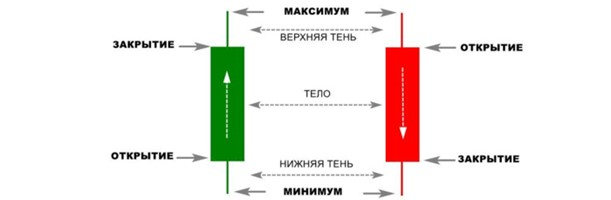

Свеча показывает, как менялась цена актива за определенный период. Это визуальное отображение цены открытия, закрытия, а также максимума и минимума за определенный промежуток. В отличие от свечного, обычный линейный график показывает только цену последней сделки за период.



---


График японских свечей за пследние 20 дней

In [ ]:
import plotly.graph_objects as go
# свечной график за последние 20 дней
cola_20 = cola.tail(20)
cola_20['direction'] = cola_20['Close'] >= cola_20['Open']  
colors = {'yes': '#3D9970', 'no': '#FF4136'} 
fig = go.Figure(data=[go.Candlestick(x=cola_20.index, open=cola_20['Open'], high=cola_20['High'], low=cola_20['Low'], 
                                     close=cola_20['Close'], increasing_line_color=colors['yes'], decreasing_line_color=colors['no'], name='')]) 
fig.update_layout(title='График японских свечей Стоимость акций компании за последние 20 дней(свечной график)', 
                  xaxis_rangeslider_visible=False, xaxis_title='Дата', yaxis_title='Цена') 
fig.show()

Тени свечей могут показать, когда покупатели или продавцы теряют силу на рынке. 

Например 17 декабря 2021 , сначала свеча сильно росла, но к закрытию упала, оставив большую верхнюю тень. Это значит, что сначала рынок контролировали покупатели, но затем участники торгов поменяли свою точку зрения. Продавцов стало больше, и цена упала. 

Чем выше растущая свеча (10 декабря 2021), тем больше покупателей на рынке.

Чем ниже падающая свеча (30 ноября 2021), тем больше продавцов. 

Когда рынок под полным контролем продавцов или покупателей, торговать против движения цены опасно.


---



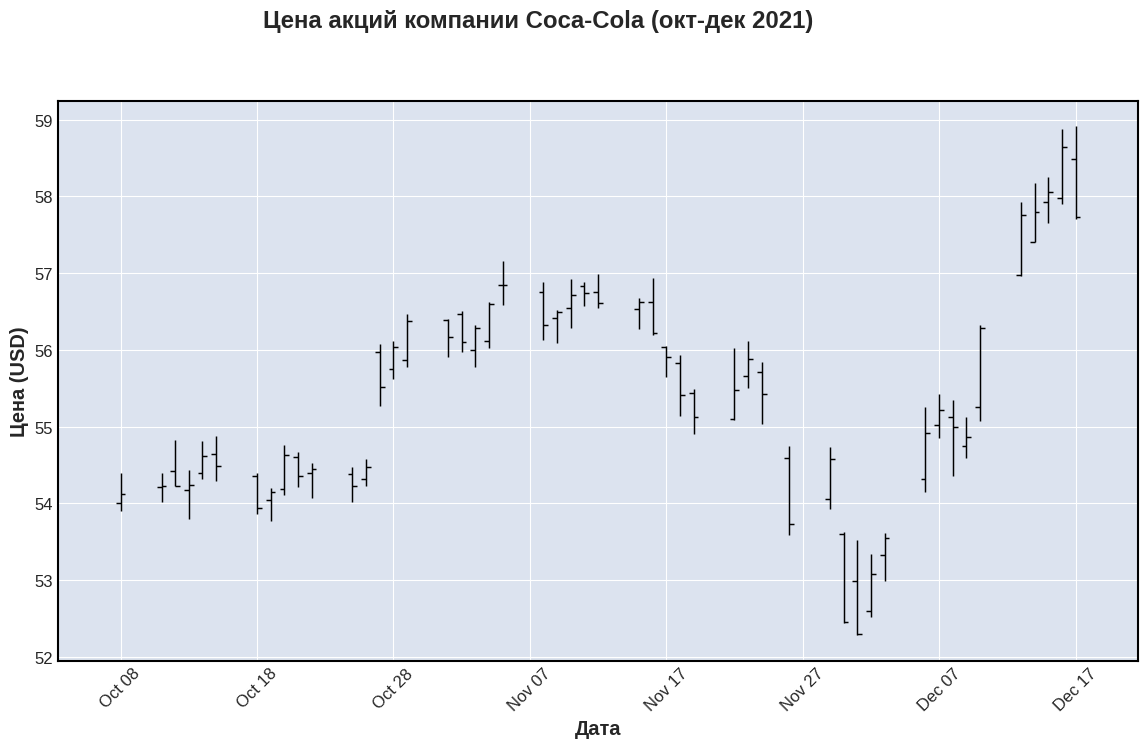

In [ ]:
#График баров (OHLC)
cola_2021=cola.tail(50)
cola_daily = cola_2021.resample('D').agg({'Open': 'first', 'High':'max', 'Low':'min', 'Close':'last'}) 
mpf.plot(cola_daily, figsize=(15,8), title='Цена акций компании Coca-Cola (окт-дек 2021)', ylabel='Цена (USD)', xlabel='Дата') 
#mpf.show()

График баров является инструментом анализа актива, который формируется в виде вертикальных линий.
Верхняя и нижняя тени баров показывают максимум и минимум цены.
Горизонтальные линии сбоку баров демонстрируют уровни открытия и закрытия цены за определенный временной промежуток.

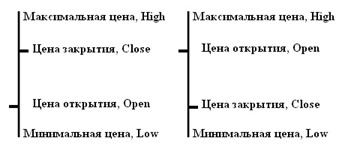

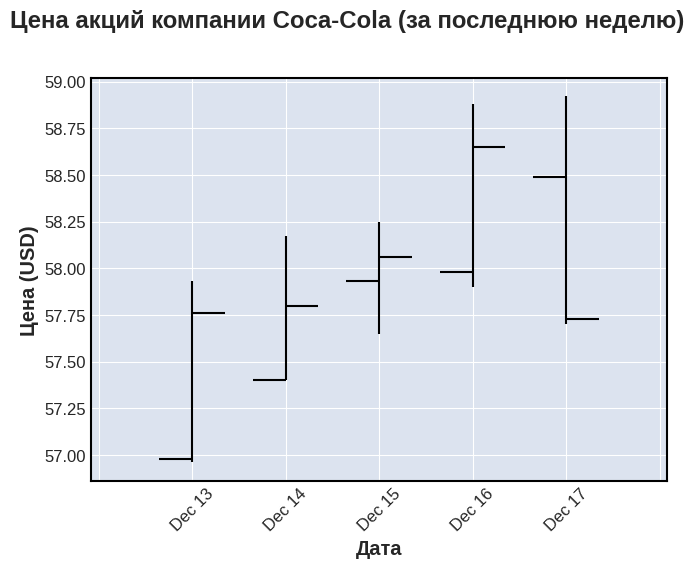

In [ ]:
cola_daily = cola_new.tail(5).resample('D').agg({'Open': 'first', 'High':'max', 'Low':'min', 'Close':'last'}) 
# Plot the candlestick chart 
mpf.plot(cola_daily, title='Цена акций компании Coca-Cola (за последнюю неделю)', ylabel='Цена (USD)', xlabel='Дата')  
#mpf.show()

Если цена открытия расположена ниже цены закрытия (13 декабря 2021), то бар является бычьим. Если цена открытия, наоборот, расположена выше цены закрытия (17 декабря 2021), то бар называется медвежьим.

Бычий тренд (или бычий рынок) формируется, когда на рынке доминируют покупатели. Они рассчитывают, что цена акций будет расти, и они заработают на этом. 

Медвежий тренд (или медвежий рынок) — время продавцов, задача которых — успеть продать акции, пока они не подешевели.

В целом, и свечи и бары показывают одну и ту же информацию за конкретно взятый промежуток времени:

•	максимум цены;

•	минимум цены;

•	открытие;

•	закрытие.

Эти данные помогают трейдерам:

•	определять направленность трендового движения;

•	находить выгодные точки входа в сделку и выхода из нее;

•	прогнозировать развороты цены;

•	измерять волатильность и наблюдать другие изменения, происходящие на рынке.

Отличием баров от свечей является иная классификация и терминология, так как бары разрабатывались и применялись на Западе.


---



Набор данных представленный для исследования готов к дальнейшему построению моделей прогнозирования и сам по себе является хорошим инструментом для анализа рынка акций компании.

## Построение моделей, анализ результатов.

**Проверка на статичность**

Тест Дики-Фуллера

Тест Дики-Фуллера — это статистический тест, используемый для определения того, является ли набор данных временного ряда стационарным или нестационарным.

Временной ряд считается стационарным, если его статистические свойства не меняются со временем. Это означает, что среднее значение, дисперсия и ковариация между значениями ряда не зависят от времени.

Стационарность временного ряда важна для анализа и прогнозирования, так как она позволяет использовать статистические методы для изучения свойств ряда и выявления закономерностей. Если ряд нестационарен, то его свойства могут меняться со временем, что затрудняет анализ и прогнозирование.

Например, если ряд нестационарен, то его среднее значение может меняться со временем, что затрудняет определение тренда. Также, если дисперсия ряда меняется со временем, то это может привести к неправильной интерпретации результатов анализа.

Поэтому, для анализа и прогнозирования временных рядов, необходимо сначала проверить их стационарность и при необходимости применять методы для достижения стационарности.

In [ ]:
# функция теста Дики Фуллера
def test_stationarity(timeseries):
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey-Fuller Test:')
    print ("==============================================")
    
    dftest = adfuller(timeseries, autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)
    

In [ ]:
# преобразование датафрейма в series 'Close' (цена закрытия)
cola_new1 = cola_new['Close']

In [ ]:
test_stationarity(cola_new1)

Results of Dickey-Fuller Test:
Test Statistic                     0.505173
p-value                            0.985029
#lags Used                        47.000000
Number of Observations Used    21852.000000
Critical Value (1%)               -3.430649
Critical Value (5%)               -2.861672
Critical Value (10%)              -2.566840
dtype: float64


Статистика теста: 0,505173

Статистика теста является мерой того, насколько данные отклоняются от нулевой гипотезы нестационарности. В этом случае тестовая статистика положительна, что указывает на нестационарность данных.

p-значение: 0,985029 

p-значение — это вероятность получения тестовой статистики столь же экстремальной, как наблюдаемая, при условии, что нулевая гипотеза верна. В этом случае p-значение очень велико (близко к 1), что указывает на то, что мы не можем отвергнуть нулевую гипотезу нестационарности.

Критическое значение (1%): -3,430649

Критическое значение (5%): -2,861672

Критическое значение (10%): -2,566840 

Критические значения — это значения, которые должна превысить тестовая статистика, чтобы отвергнуть нулевую гипотезу на уровнях значимости 1%, 5% и 10%. В этом случае тестовая статистика намного меньше критических значений, что указывает на то, что мы не можем отвергнуть нулевую гипотезу нестационарности.

В целом результаты теста Дики-Фуллера показывает, что набор данных временных рядов нестационарен и требует дальнейшего анализа и преобразования, чтобы сделать его стационарным.

In [ ]:
# преобразуем датасет в периодичность помесячно и поробуем еще раз
cola_month = cola_new.resample('M').mean()
print (type(cola_month))
print (cola_month.head(3))

<class 'pandas.core.frame.DataFrame'>
                Open      High       Low     Close
Date                                              
1962-01-31  0.248503  0.250792  0.245150  0.247613
1962-02-28  0.243397  0.245559  0.241629  0.243187
1962-03-31  0.245359  0.247091  0.243941  0.245348


In [ ]:
cola_m= cola_month['Close']
print (type(cola_m))

<class 'pandas.core.series.Series'>


In [ ]:
# проверка на стационарость
test_stationarity(cola_m)

Results of Dickey-Fuller Test:
Test Statistic                   0.782808
p-value                          0.991354
#lags Used                      18.000000
Number of Observations Used    701.000000
Critical Value (1%)             -3.439713
Critical Value (5%)             -2.865672
Critical Value (10%)            -2.568970
dtype: float64


Статистика теста: 0,782808 Тестовая статистика положительна, что указывает на нестационарность данных.

p-значение: 0,991354 Мы не можем отвергнуть нулевую гипотезу нестационарности.

Критическое значение (1%): -3,439713

Критическое значение (5%): -2,865672

Критическое значение (10%): -2,568970 
Мы не можем отвергнуть нулевую гипотезу нестационарности.

Теста Дики-Фуллера снова показывает, что набор данных временных рядов нестационарен и требует дальнейшего анализа и преобразования, чтобы сделать его стационарным.

In [ ]:
# попробуем сделать наш датасет стационарным

colamlog = np.log10(cola_m)
colamlog.dropna(inplace=True)

colamlogdiff = colamlog.diff(periods=1)
colamlogdiff.dropna(inplace=True)
# проверяем стационарность
test_stationarity(colamlogdiff)

Results of Dickey-Fuller Test:
Test Statistic                -1.801127e+01
p-value                        2.714067e-30
#lags Used                     1.000000e+00
Number of Observations Used    7.170000e+02
Critical Value (1%)           -3.439503e+00
Critical Value (5%)           -2.865579e+00
Critical Value (10%)          -2.568921e+00
dtype: float64


Статистика теста: -1.801127e+01 

В этом случае тестовая статистика отрицательна и велика по величине, что указывает на убедительные доказательства против нулевой гипотезы нестационарности.

p-значение: 2,714067e-30 

В этом случае значение p очень мало (близко к 0), что указывает на убедительные доказательства против нулевой гипотезы нестационарности.

Критическое значение (1%): -3,439503e+00

Критическое значение (5%): -2,865579e+00

Критическое значение (10%): -2,568921e+00 

В этом случае тестовая статистика намного меньше критических значений, что указывает на убедительные доказательства против нулевой гипотезы нестационарности.

В целом результаты теста Дики-Фуллера показывают, что набор данных временного ряда является стационарным.

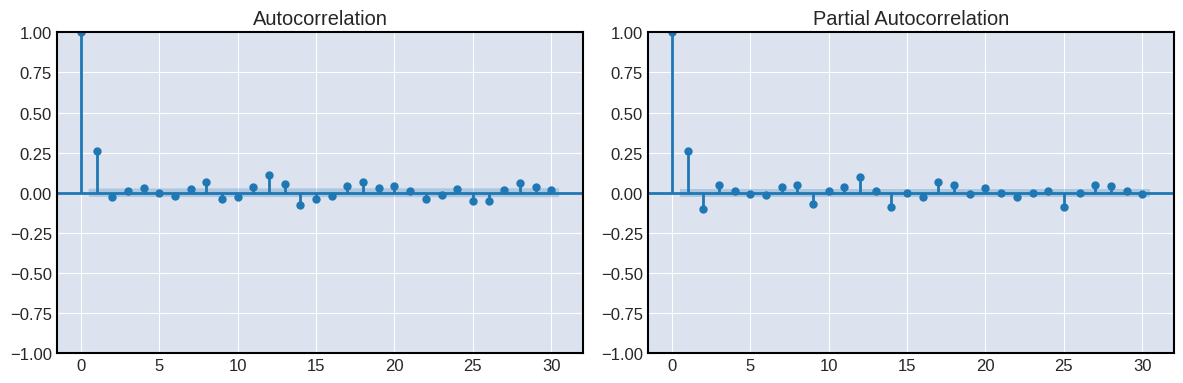

In [ ]:
# Давайте построим графики ACF и PACF для визуализации компонентов AR и MA.

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(colamlogdiff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(colamlogdiff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

При выполнении данного проекта мной были опробованы построения моделей с разной периодичностью, с датасетом приведенным к стационарному виду и нет, и были выбраны те, которые показали лучшие результаты.
В данной работе стационарность никак не влияла на результат прогнозирования, поэтому был использован набор данных не преобразованный в стационарный вид. 

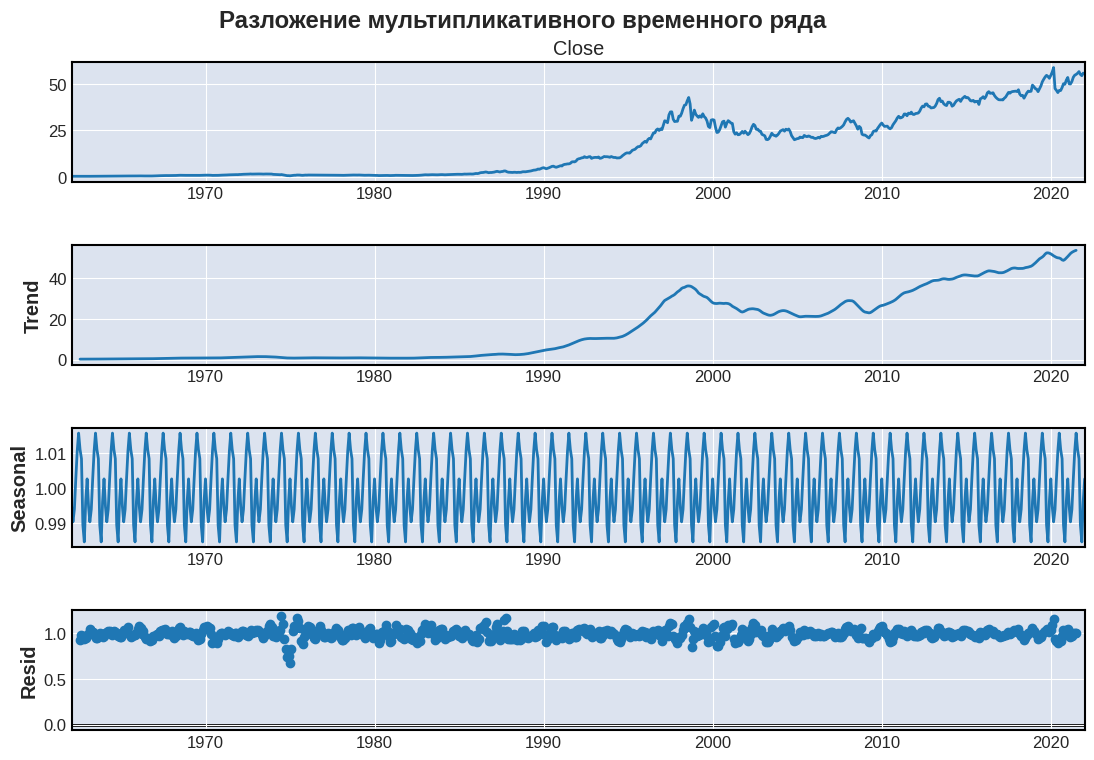

In [ ]:
#Мультипликативная модель полезна, когда сезонные колебания увеличиваются с течением времени.
decomposition = sm.tsa.seasonal_decompose(cola_m, model='multiplicative')

fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Разложение мультипликативного временного ряда')
plt.show()

In [ ]:
#разделим датасет на тренировочную и тестовую версии для Sarima
train = cola_m.iloc[:700]
test = cola_m.iloc[700:]

###SARIMA

SARIMA расшифровывается как Seasonal Autoregressive Integrated Moving Average. Это тип модели временного ряда, который используется для прогнозирования будущих значений переменной временного ряда на основе ее прошлых значений.

«AR» в SARIMA означает авторегрессию, что означает, что модель использует прошлые значения переменной для прогнозирования будущих значений. «MA» означает скользящее среднее, что означает, что модель использует прошлые ошибки прогнозирования для прогнозирования будущих значений. «I» означает интегрированный, что означает, что модель использует разность, чтобы сделать временной ряд стационарным (Для удаления тенденций и сезонности).

«S» в SARIMA означает сезонность, что означает, что модель учитывает тот факт, что некоторые переменные временного ряда имеют сезонные закономерности (например, активность на фондовом рынке, как правило, ниже в праздничный сезон). Сезонный компонент модели представлен термином «S», который указывает продолжительность сезонного цикла (например, 12 для месячных данных с годовым циклом).

Таким образом, SARIMA — это модель временных рядов, которая использует прошлые значения, ошибки прогнозирования и разности для прогнозирования будущих значений переменной временного ряда с учетом любых сезонных закономерностей в данных. Это мощный инструмент для анализа и прогнозирования данных временных рядов, который широко используется в таких областях, как финансы, экономика и инженерия.

In [ ]:
auto_arima(cola_m, seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  720
Model:             SARIMAX(2, 1, 2)x(0, 0, 2, 12)   Log Likelihood                -999.210
Date:                            Wed, 26 Apr 2023   AIC                           2014.421
Time:                                    16:11:36   BIC                           2051.044
Sample:                                01-31-1962   HQIC                          2028.560
                                     - 12-31-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2116      0.152      1.391      0.164      -0.087       0.510
ar.L1         -0.9917      0.039    -25.484      0.000      -1.068      -0.915
ar.L2         -0.7857      0.036    -21.852      0.000      -0.856      -0.715
ma.L1          1.1380      0.026     43.707      0.000       1.087       1.189
ma.L2          0.9015      0.027     33.732      0.000       0.849       0.954
ma.S.L12       0.0891      0.023      3.905      0.000       0.044       0.134
ma.S.L24       0.0958      0.031      3.106      0.002       0.035       0.156
sigma2         0.9420      0.017     56.538      0.000       0.909       0.975
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):             29532.86
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):             317.09   Skew:                            -2.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train, order=(2,1 ,2), seasonal_order=(0,0 ,2,12 ) )
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  700
Model:             SARIMAX(2, 1, 2)x(0, 0, 2, 12)   Log Likelihood                -960.752
Date:                            Wed, 26 Apr 2023   AIC                           1935.504
Time:                                    16:11:40   BIC                           1967.352
Sample:                                01-31-1962   HQIC                          1947.816
                                     - 04-30-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0151      0.036    -28.175      0.000      -1.086      -0.944
ar.L2         -0.8006      0.038    -20.889      0.000      -0.876      -0.726
ma.L1          1.1605      0.024     49.074      0.000       1.114       1.207
ma.L2          0.9105      0.026     34.997      0.000       0.860       0.962
ma.S.L12       0.1499      0.030      5.015      0.000       0.091       0.209
ma.S.L24       0.0890      0.031      2.853      0.004       0.028       0.150
sigma2         0.9134      0.016     56.854      0.000       0.882       0.945
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):             30670.74
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):             849.72   Skew:                            -2.87
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

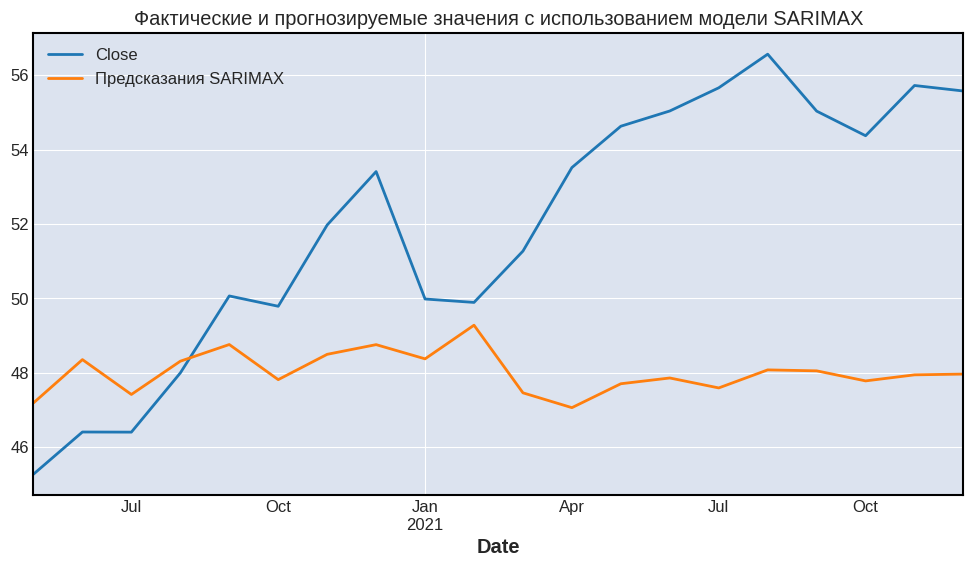

In [ ]:
start = len(train)
end = len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('Предсказания SARIMAX')
plt.title('Фактические и прогнозируемые значения с использованием модели SARIMAX')
test.plot(figsize=(12,6), legend=True);
predictions.plot(figsize=(12,6), legend=True);


In [ ]:
model = SARIMAX(cola_m, order=(2, 1, 2), seasonal_order=(0,0 ,2 ,12 ) )
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  720
Model:             SARIMAX(2, 1, 2)x(0, 0, 2, 12)   Log Likelihood               -1000.524
Date:                            Wed, 26 Apr 2023   AIC                           2015.049
Time:                                    16:11:47   BIC                           2047.094
Sample:                                01-31-1962   HQIC                          2027.421
                                     - 12-31-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9885      0.039    -25.075      0.000      -1.066      -0.911
ar.L2         -0.7826      0.036    -21.728      0.000      -0.853      -0.712
ma.L1          1.1361      0.027     42.845      0.000       1.084       1.188
ma.L2          0.8996      0.027     33.398      0.000       0.847       0.952
ma.S.L12       0.0930      0.023      4.100      0.000       0.049       0.137
ma.S.L24       0.1008      0.031      3.251      0.001       0.040       0.162
sigma2         0.9454      0.016     60.594      0.000       0.915       0.976
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):             29335.60
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):             897.10   Skew:                            -2.82
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: title={'center': 'Предсказания на 21 шаг вперед'}>

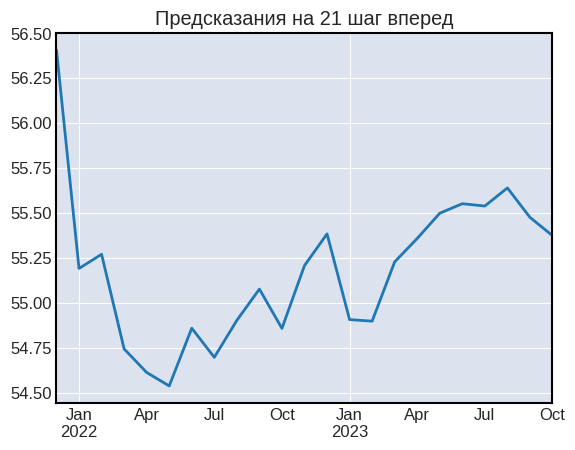

In [ ]:
fcast = results.predict(len(cola_m)-1, len(cola_m)+21, dynamic=False, typ='levels').rename('Предсказания на 21 шаг вперед')
plt.title('Предсказания на 21 шаг вперед')
fcast.plot()

Text(0.5, 1.0, 'Фактические и прогнозируемые значения с использованием модели SARIMAX')

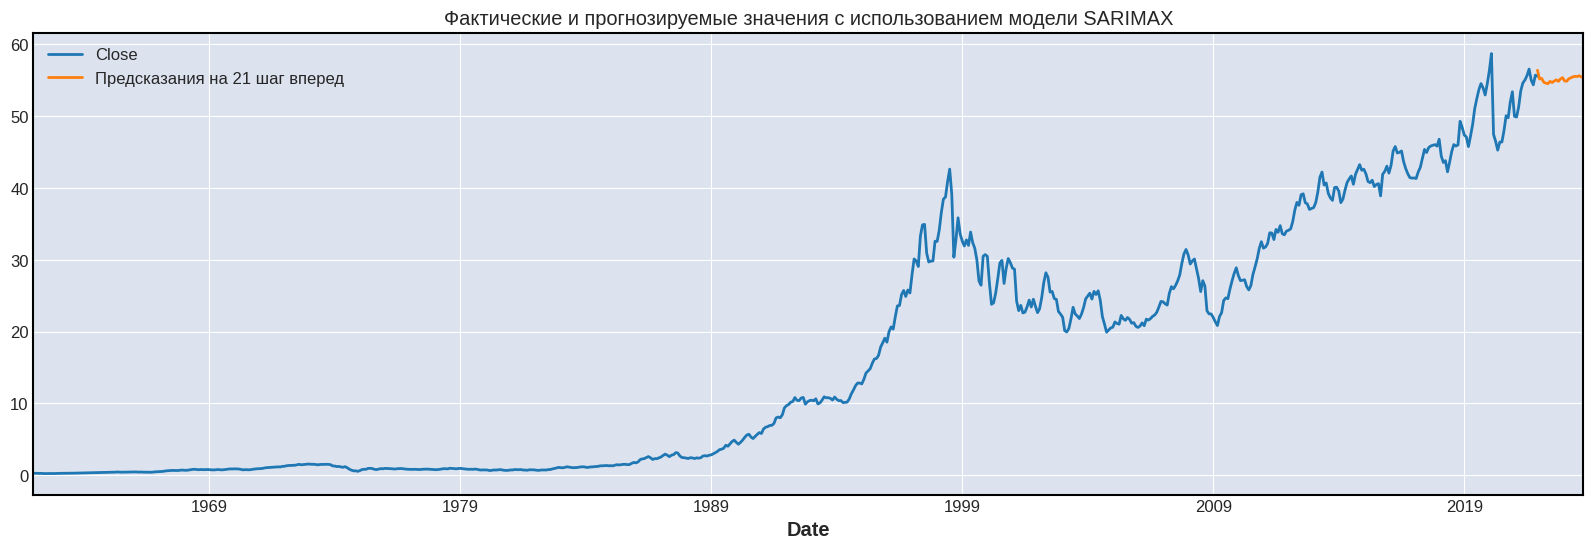

In [ ]:
cola_m.plot(figsize=(20,5), legend=True);
fcast.plot(figsize=(20,6), legend=True);
plt.title('Фактические и прогнозируемые значения с использованием модели SARIMAX')

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
mse_value= mean_squared_error(test,predictions)
rmse_value= rmse(test, predictions)
mape = np.mean(np.abs((test - predictions) / test)) * 100


print(f'SARIMAX(2, 1, 2)x(0, 0, [2], 12) MSE Error: {mse_value:11.10}')
print(f'SARIMAX(2, 1, 2)x(0, 0, [2], 12) RMSE Error: {rmse_value:11.10}')
print("SARIMAX(2, 1, 2)x(0, 0, [2], 12) MAPE: {:.2f}%".format(mape))

SARIMAX(2, 1, 2)x(0, 0, [2], 12) MSE Error: 27.73531984
SARIMAX(2, 1, 2)x(0, 0, [2], 12) RMSE Error: 5.266433313
SARIMAX(2, 1, 2)x(0, 0, [2], 12) MAPE: 8.25%


Основываясь на оценочных показателях, можно сделать вывод, что модель SARIMAX(2, 1, 2)x(0, 0, [2], 12) показала умеренные результаты при прогнозировании цен на акции. Средняя абсолютная процентная ошибка (MAPE), равная 8,25%, указывает на то, что средняя абсолютная процентная разница между фактическими и прогнозируемыми ценами составляет 8,25%. Это умеренная ошибка, которая предполагает, что модель достаточно точна в своих прогнозах.

Среднеквадратическая ошибка (MSE) 27,74 и среднеквадратическая ошибка (RMSE) 5,27 также указывают на то, что модель работает умеренно хорошо. MSE измеряет среднюю квадратичную разницу между фактическими и прогнозируемыми ценами, а RMSE представляет собой квадратный корень из MSE. Более низкие MSE и RMSE указывают на то, что прогнозы модели ближе к фактическим ценам.

Также существует значительная разница между прогнозируемыми значениями и фактическими значениями при построении графика, это может указывать на то, что модель не захватывает все закономерности в данных.

Возможно, модель в среднем работает хорошо, но не может фиксировать определенные закономерности или выбросы в данных. Рекомендуется изучить другие модели и методы для повышения точности прогнозов. 

---



# Модель Хольта-Винтерса

Метод Хольта-Винтерса - это метод прогнозирования временных рядов, который позволяет предсказывать будущие значения на основе прошлых данных. Он основан на тренде, сезонности и уровне временного ряда.

Тренд - это общее направление изменения временного ряда в течение длительного периода времени. Например, если продажи продукта растут со временем, то это будет положительный тренд. Если продажи падают, то это будет отрицательный тренд.

Сезонность - это повторяющиеся паттерны в данных, которые повторяются в течение года или другого периода времени. Например, если продажи игрушек растут перед Рождеством и падают после него, то это будет сезонность.

Уровень - это базовый уровень временного ряда, который не меняется со временем. Например, если средняя продажа продукта составляет 100 единиц в месяц, то это будет уровень.

Метод Хольта-Винтерса использует эти три компоненты для прогнозирования будущих значений временного ряда. Он учитывает изменения тренда и сезонности, а также сохраняет уровень временного ряда. Это позволяет получить более точный прогноз, чем простое экстраполирование прошлых значений.

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
#для этой модели было решено использовать последние 2 года с периодичностью ежедневно
cola_d=cola_new1.tail(730)

In [ ]:
train_hw=cola_d[:700]
test_hw=cola_d[700:]

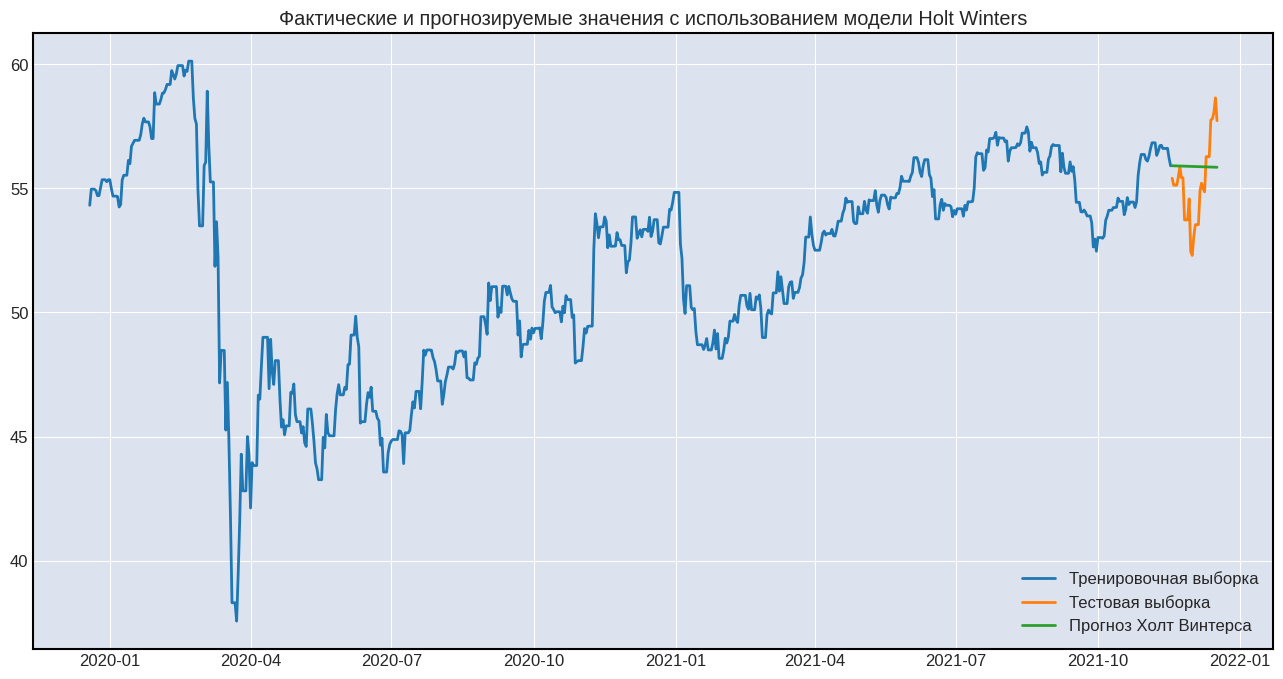

In [ ]:
future2 = ExponentialSmoothing(train_hw, trend='mul').fit()
forecast_hw = future2.forecast(30)

plt.figure(figsize=(16,8))
plt.plot(train_hw, label='Тренировочная выборка')
plt.plot(test_hw, label='Тестовая выборка')
plt.plot(forecast_hw, label='Прогноз Холт Винтерса')
plt.legend(loc='best')
plt.title('Фактические и прогнозируемые значения с использованием модели Holt Winters')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test_hw, forecast_hw))
print("RMSE:", rmse)
mse = mean_squared_error(test_hw, forecast_hw)
print("MSE:", mse)
mape = np.mean(np.abs((test_hw - forecast_hw) / test_hw)) * 100
print("MAPE:", mape)

RMSE: 1.7770878687028244
MSE: 3.158041293090747
MAPE: 2.70126672464949


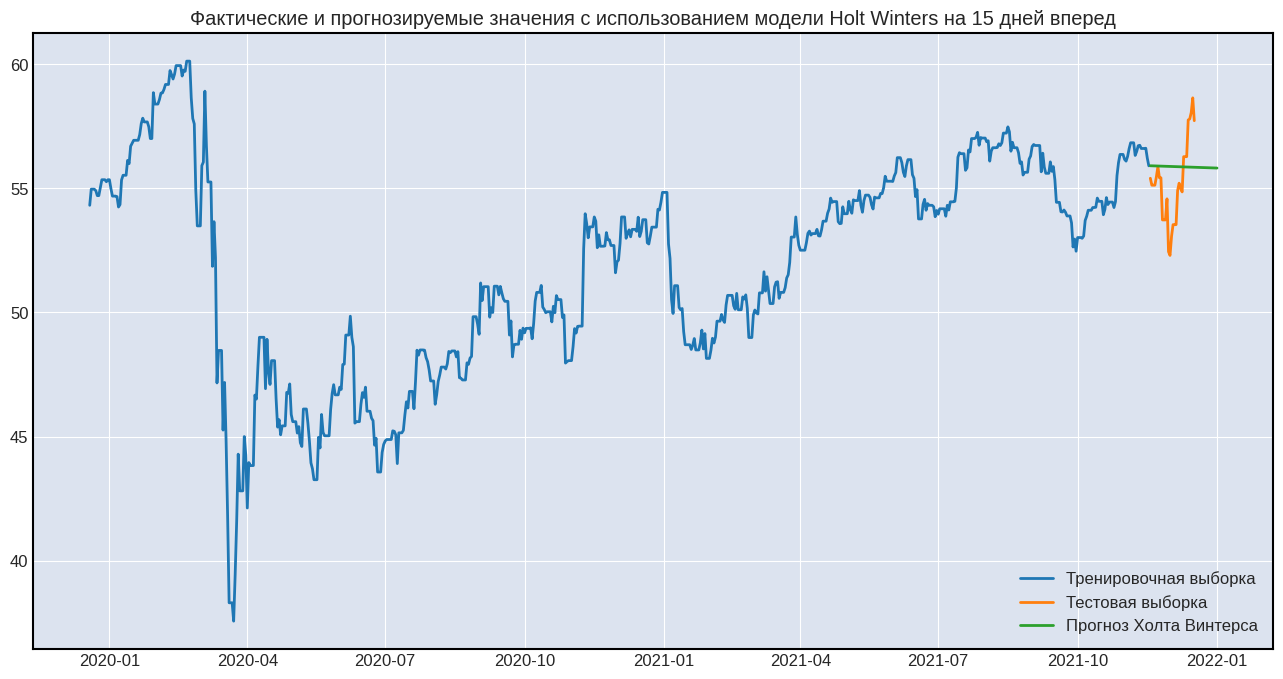

In [ ]:
future2 = ExponentialSmoothing(train_hw, trend='mul').fit()
forecast_hw = future2.forecast(45)

plt.figure(figsize=(16,8))
plt.plot(train_hw, label='Тренировочная выборка')
plt.plot(test_hw, label='Тестовая выборка')
plt.plot(forecast_hw, label='Прогноз Холта Винтерса')
plt.legend(loc='best')
plt.title('Фактические и прогнозируемые значения с использованием модели Holt Winters на 15 дней вперед')
plt.show()

К прогнозу, полученному с помощью метода Хольта-Винтерса, были применены метрики оценки точности прогноза: RMSE, MSE и MAPE. Значение RMSE составило 1.78, что указывает на то, что среднее отклонение между прогнозом и фактическими значениями составляет около 1.78 единиц. Значение MSE составило 3.16, что является средним значением квадратов отклонений между прогнозом и фактическими значениями. Значение MAPE составило 2.70%, что указывает на то, что среднее процентное отклонение между прогнозом и фактическими значениями составляет около 2.70%. В целом, эти метрики свидетельствуют о том, что метод Хольта-Винтерса обеспечил достаточно точный прогноз для данного набора данных. 

Однако, следует отметить, что на графике тестовая выборка и прогноз не совпадают, так что точность прогноза довольна сомнительна.

Поэтому было принято решение применить дополнительную модель прогнозирования к данному датасету.

#LSTM Длинная краткосрочная память

Long short term memory (LSTM) — это тип архитектуры рекуррентной нейронной сети (RNN), который обычно используется для обработки последовательных данных, таких как данные временных рядов.

Сети LSTM предназначены для преодоления проблемы исчезающего градиента, которая может возникнуть в традиционных RNN, что может затруднить для сети изучение долгосрочных зависимостей в данных. Сети LSTM используют ячейку памяти, которая может хранить информацию с течением времени и выборочно забывать или запоминать информацию на основе входных данных.

В Python сети LSTM могут быть реализованы с использованием различных сред глубокого обучения, таких как TensorFlow, Keras и PyTorch. Эти платформы предоставляют предварительно созданные слои LSTM, которые можно добавить в модель нейронной сети и обучить на последовательных данных.

In [ ]:
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from keras.models import Sequential # Create Model
from keras.layers import Dense # Neurons
from keras.layers import LSTM # Long Short Term Memory
from sklearn.preprocessing import MinMaxScaler # Normalize
from sklearn.metrics import mean_squared_error # Loss Function
from sklearn.model_selection import train_test_split

In [ ]:
#так как датасет довольно большой, было принято решение для этой модели взять последние 2 года
cola_d=cola_new1.tail(730)

In [ ]:
scale = MinMaxScaler()
scalled = scale.fit_transform(cola_new)
i = 0
for col in cola_new.columns:
    cola_new[col] = scalled[:,i]
    i += 1

In [ ]:
data = cola_d.to_frame() #преобразование series в датафрейм
dataset = data.values #преобразование data frame в numpy array
training_data_len = math.ceil(len(dataset)*.8)  # тренировочная модель

In [ ]:
#масштабирование данных
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

train_data = scaled_data[0:training_data_len, :]
#разделение данных на x_train, y_train 
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.7425786 , 0.77137794, 0.77137794, 0.77137794, 0.76871949,
       0.75985813, 0.75985813, 0.77359322, 0.78821431, 0.78821431,
       0.78821431, 0.78466987, 0.78821431, 0.78821431, 0.77226411,
       0.758972  , 0.758972  , 0.758972  , 0.75808582, 0.73947714,
       0.74390771, 0.78777133, 0.79618954, 0.79618954, 0.79618954,
       0.82277359, 0.81701369, 0.84802836, 0.8533451 , 0.85866185,
       0.85866185, 0.85866185, 0.85866185, 0.86885233, 0.88834736,
       0.89809486, 0.89144878, 0.89144878, 0.89144878, 0.88258746,
       0.86176327, 0.86176327, 0.94373062, 0.92334962, 0.92334962,
       0.92334962, 0.93132481, 0.94284444, 0.94328742, 0.94949052,
       0.95835171, 0.95835171, 0.95835171, 0.98316345, 0.97607439,
       0.9680992 , 0.97696057, 0.99202481, 0.99202481, 0.99202481])]
[0.992024811696943]



In [ ]:
#преобразование x_train и y_train  в numpy
x_train,y_train = np.array(x_train), np.array(y_train)
#преобразование формы данных
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(524, 60, 1)

In [ ]:
#Построение модели LSTM
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))
#Компилирование модели
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Тренируем модель
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
524/524 [==============================] - 24s 38ms/step - loss: 0.0080
Epoch 2/10
524/524 [==============================] - 21s 40ms/step - loss: 0.0040
Epoch 3/10
524/524 [==============================] - 18s 35ms/step - loss: 0.0028
Epoch 4/10
524/524 [==============================] - 19s 36ms/step - loss: 0.0023
Epoch 5/10
524/524 [==============================] - 19s 36ms/step - loss: 0.0021
Epoch 6/10
524/524 [==============================] - 19s 37ms/step - loss: 0.0019
Epoch 7/10
524/524 [==============================] - 21s 39ms/step - loss: 0.0019
Epoch 8/10
524/524 [==============================] - 18s 35ms/step - loss: 0.0017
Epoch 9/10
524/524 [==============================] - 22s 42ms/step - loss: 0.0018
Epoch 10/10
524/524 [==============================] - 19s 35ms/step - loss: 0.0017


In [ ]:
test_data= scaled_data[training_data_len-60:, :]
#создание x_test и y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(146, 60, 1)

In [ ]:
#прогноз
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

5/5 [==============================] - 1s 21ms/step


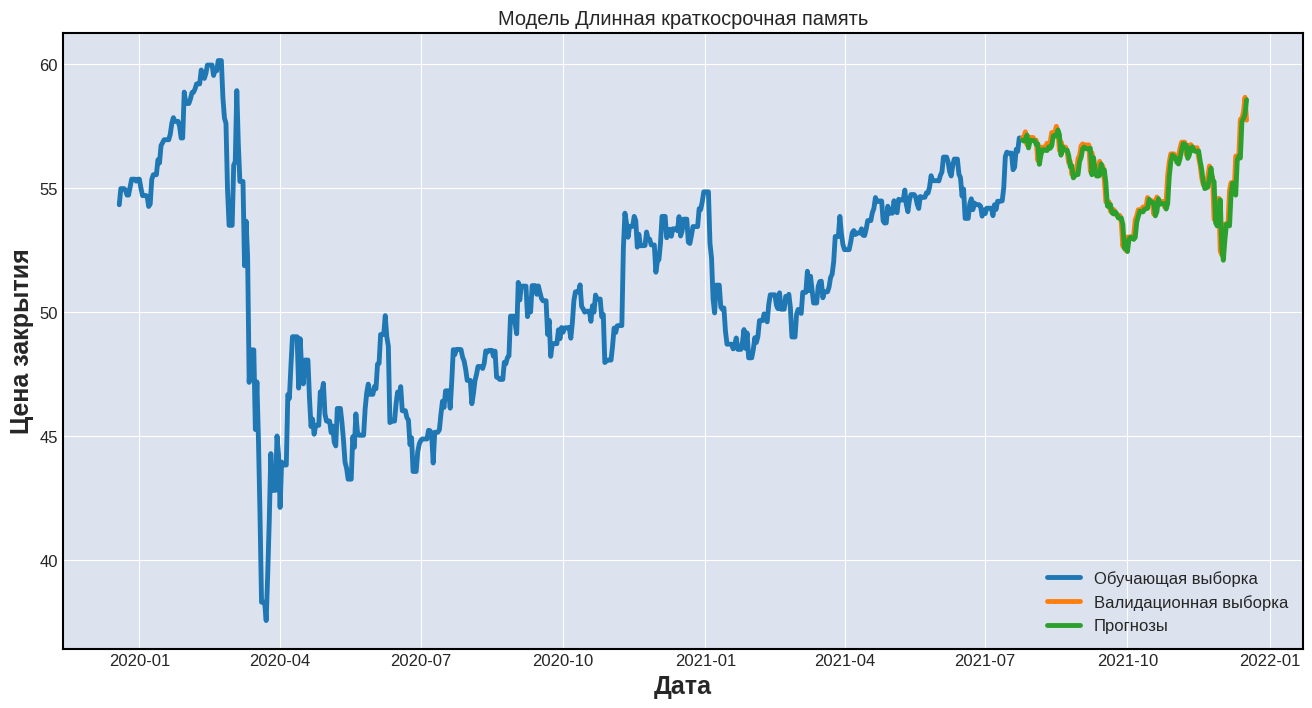

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'
#строим график
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#визуализируем данные
plt.figure(figsize=(16,8))
plt.title('Модель Длинная краткосрочная память')
plt.xlabel('Дата', fontsize=18)
plt.ylabel('Цена закрытия' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Обучающая выборка', 'Валидационная выборка', 'Прогнозы'])

In [ ]:
#сравнение производительности модели LSTM на валидационном наборе данных
valid

,Close,Predictions
Date,,
2021-07-25,57.009998,56.933010
2021-07-26,57.060001,56.883255
2021-07-27,57.259998,56.917187
2021-07-28,56.740002,57.129372
2021-07-29,57.049999,56.610477
...,...,...
2021-12-13,57.759998,56.203014
2021-12-14,57.799999,57.670975
2021-12-15,58.060001,57.795258


1/1 [==============================] - 0s 27ms/step
Прогнозируемая цена на следующий день: 57.60286


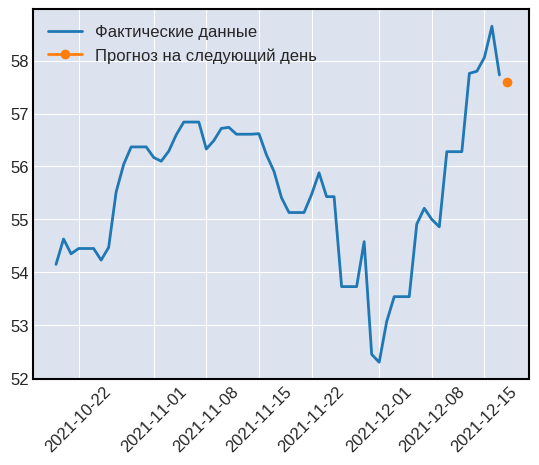

In [ ]:
last_60_days = data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print('Прогнозируемая цена на следующий день:', pred_price[0][0])
next_day = pd.date_range(start=data.index[-1], periods=2, freq='D')[1]

plt.plot(data.index[-60:], last_60_days)
plt.plot(next_day, pred_price, marker='o')
plt.legend(['Фактические данные', 'Прогноз на следующий день'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print('MAPE:', mape)
mse = mean_squared_error(y_test, predictions)
print('MSE:', mse)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

MAPE: 0.569033894352412
MSE: 0.2162741841279086
RMSE: 0.4650528831519149


Основываясь на показателях оценки, можно сделать вывод, что модель хорошо показала себя в прогнозировании цен на акции. Средняя абсолютная процентная ошибка (MAPE) 0,57% указывает на то, что средняя абсолютная процентная разница между фактическими и прогнозируемыми ценами составляет 0,57%. Это относительно низкая ошибка, которая говорит о том, что модель точна в своих прогнозах.

Среднеквадратическая ошибка (MSE) 0,21 и среднеквадратическая ошибка (RMSE) 0,46 также указывают на то, что модель работает хорошо. MSE измеряет среднюю квадратичную разницу между фактическими и прогнозируемыми ценами, а RMSE представляет собой квадратный корень из MSE. Более низкие MSE и RMSE указывают на то, что прогнозы модели ближе к фактическим ценам.

Исходя из графика, можно сделать вывод, что прогноз модели точно повторяет форму валидационной выборки.
LSTM модель показала себя с лучшей стороны и ее можно смело использовать для прогноза роста или падения акций.

С каждым запуском данного ноутбука результаты, которые выдает модель все плотнее приближены к реальным, а метрики оценки ошибки все ниже. Это происходит потому, что модель состоит из нескольких слоев, каждый из которых обрабатывает информацию о предыдущих состояниях и каждый раз, когда она используеться для предсказания, она использует свои внутренние параметры для генерации нового результата. 

## Выводы

In [ ]:
errors = {'Method': ['SARIMAX', 'Holt-Winters', 'LSTM'],
        'RMSE': [5.266433313, 1.7770878687028244, 0.4650528831519149],
        'MSE': [27.73531984, 3.158041293090747, 0.2162741841279086],
        'MAPE': ['8.25%', '2.70%', '0.57%']}
# Create a pandas DataFrame from the dictionary
df = pd.DataFrame(errors)

# Print the DataFrame
print(df)

         Method      RMSE        MSE   MAPE
0       SARIMAX  5.266433  27.735320  8.25%
1  Holt-Winters  1.777088   3.158041  2.70%
2          LSTM  0.465053   0.216274  0.57%


В проекте были подготовлены и визуализированы данные компании Coca-Cola, а также были применены три модели прогнозирования: SARIMAX, Holt-Winters и LSTM.

Модель SARIMAX показала наименее точный прогноз, с наивысшими значениями RMSE, MSE и MAPE. Модель Holt-Winters показала хорошие результаты, с относительно низкими значениями для всех трех метрик ошибок. Модель LSTM показала лучшие результаты среди трех методов, с наименьшими значениями для всех трех метрик ошибок.

Прогноз делается с учетом того, что рынок и другие условия не изменятся в будущем. Не будет никаких изменений на рынке. Но изменение происходит постепенно, а не резко. Ситуации, подобные рецессии на американском рынке в 2008 году, могут сбить прогнозы с толку. События, такие как демонетизация, могут сбить прогнозы с толку.

В целом, проект позволил оценить различные методы прогнозирования и выбрать наиболее подходящий метод для данного набора данных. Однако, следует отметить, что точность прогноза может варьироваться в зависимости от конкретных данных и горизонта прогнозирования, поэтому всегда рекомендуется оценивать несколько методов и выбирать тот, который обеспечивает лучшие результаты для конкретных потребностей.



Модель LSTM представляется самой оптимальной для технического анализа компании. Она точно повторяет движение цен, предсказывать рост или падение акций с ее помощью очень удобно.

Эту модель можно смело использовать в тандеме с визуализацией и анализом линейных и свечных графиков, что увеличит точность прогнозирования и поможет трейдерам сберечь и приумножить свой капитал.